#libraries

In [ ]:
# Install the scholarly library to enable Google Scholar queries
# Using '-q' suppresses the usual output for a cleaner installation message
!pip install -q scholarly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00


#Keyword-based article search from Google Scholar

In [ ]:
import pandas as pd
from scholarly import scholarly

# Define the keyword for the search query
keyword = "AI"

# Initialize an empty list to store article results
results = []

# Define a function to fetch articles with pagination control
def fetch_articles(keyword, max_results=500):
    """
    Fetches academic publications from Google Scholar based on the specified keyword.

    Parameters:
        keyword (str): The search term used to query Google Scholar.
        max_results (int): The maximum number of results to retrieve.

    This function iterates through search results, extracts relevant information, and
    appends it to the results list until the max_results limit is reached.
    """
    # Create a search query using the specified keyword
    search_query = scholarly.search_pubs(keyword)
    count = 0

    # Loop through search results up to the specified max_results
    while count < max_results:
        try:
            # Get the next publication from the search query
            publication = next(search_query)

            # Extract all available fields from the publication data
            result = {
                "Title": publication['bib'].get('title', ''),
                "Authors": publication['bib'].get('author', ''),
                "Abstract": publication['bib'].get('abstract', ''),
                "Year": publication['bib'].get('pub_year', ''),
                "Venue": publication['bib'].get('venue', ''),
                "GSRank": publication.get('gsrank', ''),
                "Pub URL": publication.get('pub_url', ''),
                "Citations": publication.get('num_citations', 0),
            }

            # Append extracted data to the results list and increment the counter
            results.append(result)
            count += 1
        except StopIteration:
            # Stop the loop if no more publications are available
            break

# Execute the function to fetch articles
fetch_articles(keyword, max_results=500)

# Convert the results list into a pandas DataFrame
df = pd.DataFrame(results)

# Define the output file name and save DataFrame to an Excel file
output_file = "scholar_results_all_fields.xlsx"
df.to_excel(output_file, index=False)

# Display a message confirming where the results were saved
print(f"Results saved to {output_file}")


# Visualization of Retrieved Scholarly Article Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [4]:
# Read data from the Excel file
df = pd.read_excel("/content/scholar_results_all_fields.xlsx")

##AI Research Publications: Yearly Analysis

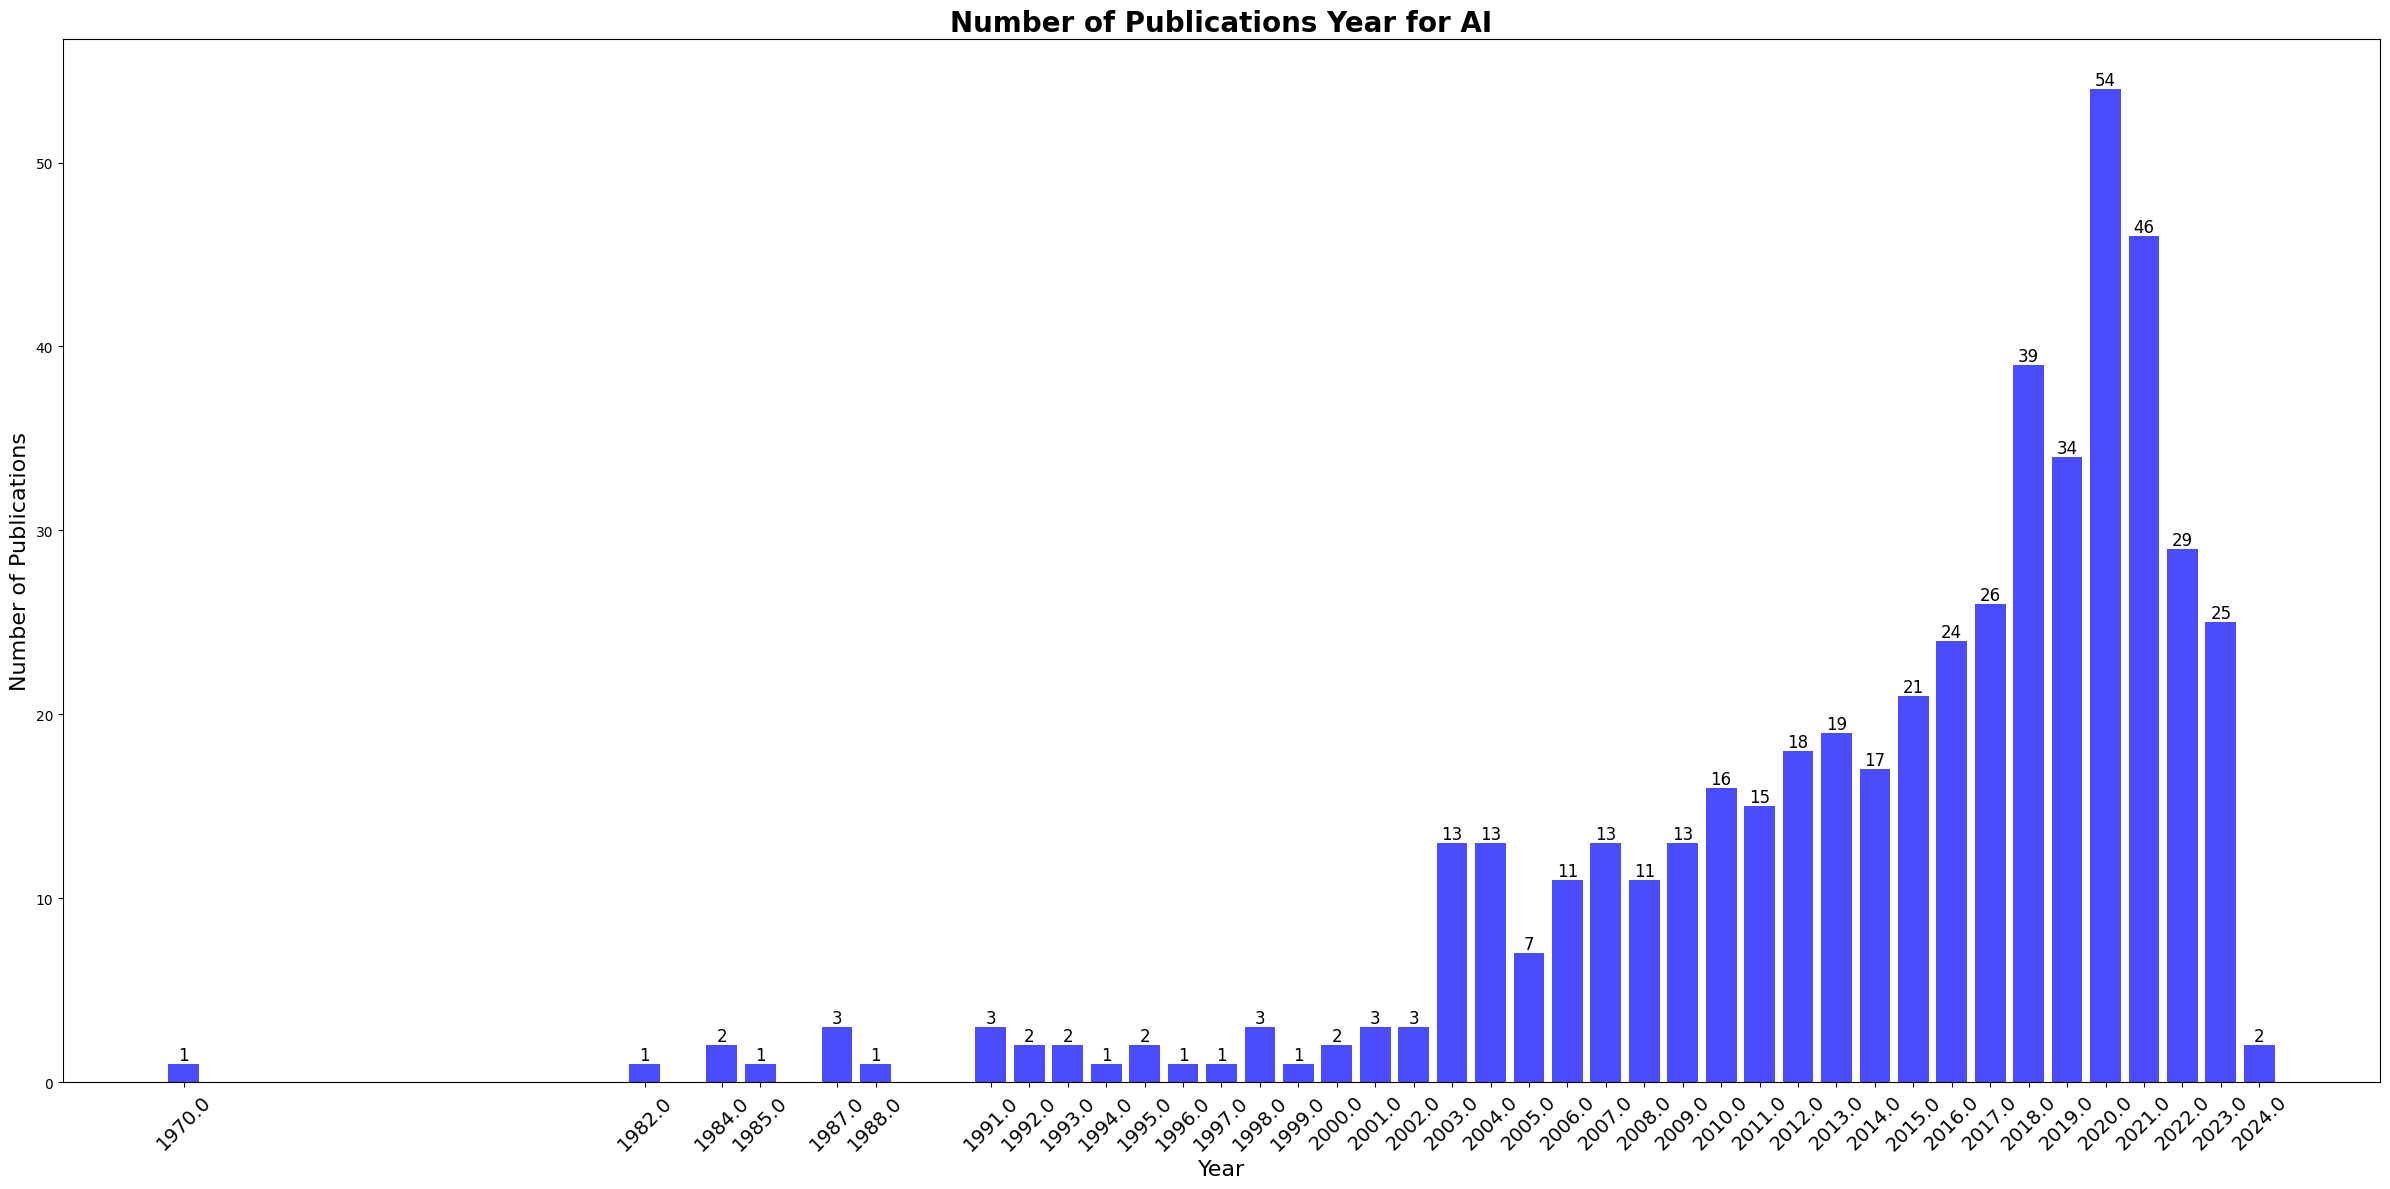

2D chart saved as 2d_publication_trend_AI.png with DPI 600.


In [5]:
# Calculate the number of publications per year
year_counts = df['Year'].value_counts().sort_index()

# Create a 2D bar plot with larger figure size for better visibility
fig, ax = plt.subplots(figsize=(24, 12))  # Increased figure size for better visibility

# Define the positions of the bars on the x-axis
x_pos = year_counts.index
y_pos = year_counts.values  # Height of the bars (number of publications)

# Create 2D bars
bars = ax.bar(x_pos, y_pos, width=0.8, color='blue', alpha=0.7)

# Customize the plot title and labels with larger fonts
ax.set_title('Number of Publications Year for AI', fontsize=20, fontweight='bold')
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Number of Publications', fontsize=16)

# Rotate the x-ticks for better visibility
ax.set_xticks(year_counts.index)
ax.set_xticklabels(year_counts.index, rotation=45, fontsize=14)  # Increased font size for x-ticks

# Add data labels on top of the bars for clarity
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=12)

# Save the plot with 600 DPI resolution
output_file = "2d_publication_trend_AI.png"
plt.savefig(output_file, dpi=600)

# Show the plot
plt.tight_layout()
plt.show()

print(f"2D chart saved as {output_file} with DPI 600.")


##AI Research Publications: Citations Analysis

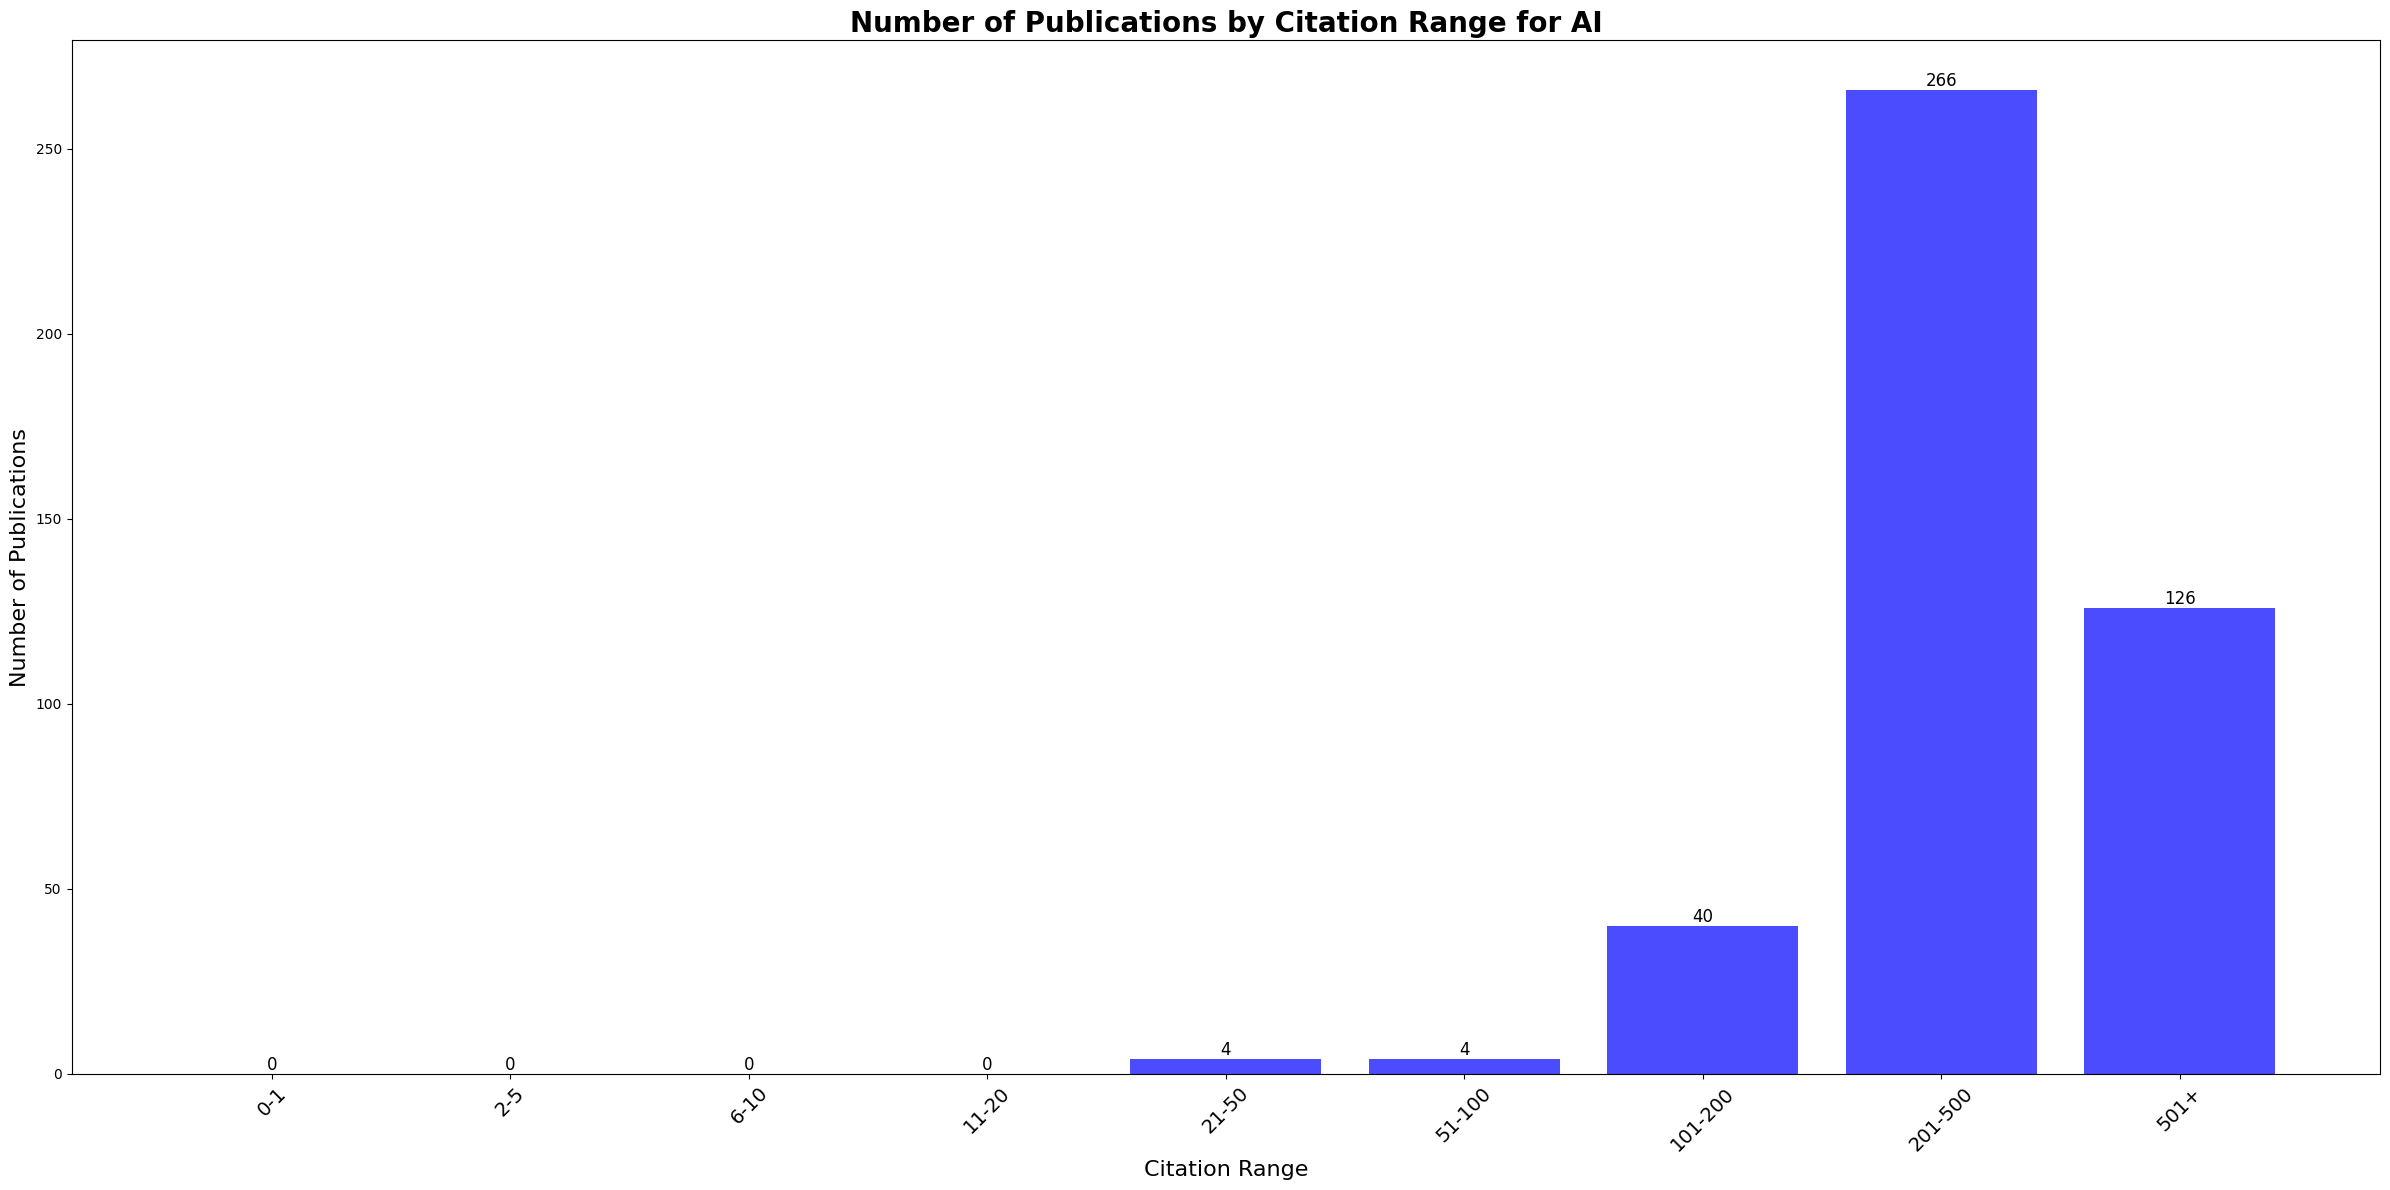

2D chart saved as 2d_citation_trend_AI_grouped.png with DPI 600.


In [6]:
# Define bins for citation ranges
bins = [0, 1, 5, 10, 20, 50, 100, 200, 500, 1000]  # Adjusted to match number of labels
labels = ['0-1', '2-5', '6-10', '11-20', '21-50', '51-100', '101-200', '201-500', '501+']

# Categorize citations into bins
df['Citation Range'] = pd.cut(df['Citations'], bins=bins, labels=labels, right=False)

# Calculate the number of publications in each citation range
citation_counts = df['Citation Range'].value_counts().sort_index()

# Create a 2D bar plot with larger figure size for better visibility
fig, ax = plt.subplots(figsize=(24, 12))  # Increased figure size for better visibility

# Define the positions of the bars on the x-axis
x_pos = citation_counts.index
y_pos = citation_counts.values  # Height of the bars (number of publications in each range)

# Create 2D bars
bars = ax.bar(x_pos, y_pos, width=0.8, color='blue', alpha=0.7)

# Customize the plot title and labels with larger fonts
ax.set_title('Number of Publications by Citation Range for AI', fontsize=20, fontweight='bold')
ax.set_xlabel('Citation Range', fontsize=16)
ax.set_ylabel('Number of Publications', fontsize=16)

# Rotate the x-ticks for better visibility
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos, rotation=45, fontsize=14)  # Increased font size for x-ticks

# Add data labels on top of the bars for clarity
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=12)

# Save the plot with 600 DPI resolution
output_file = "2d_citation_trend_AI_grouped.png"
plt.savefig(output_file, dpi=600)

# Show the plot
plt.tight_layout()
plt.show()

print(f"2D chart saved as {output_file} with DPI 600.")


##AI Research Publications: Citations Over the Years

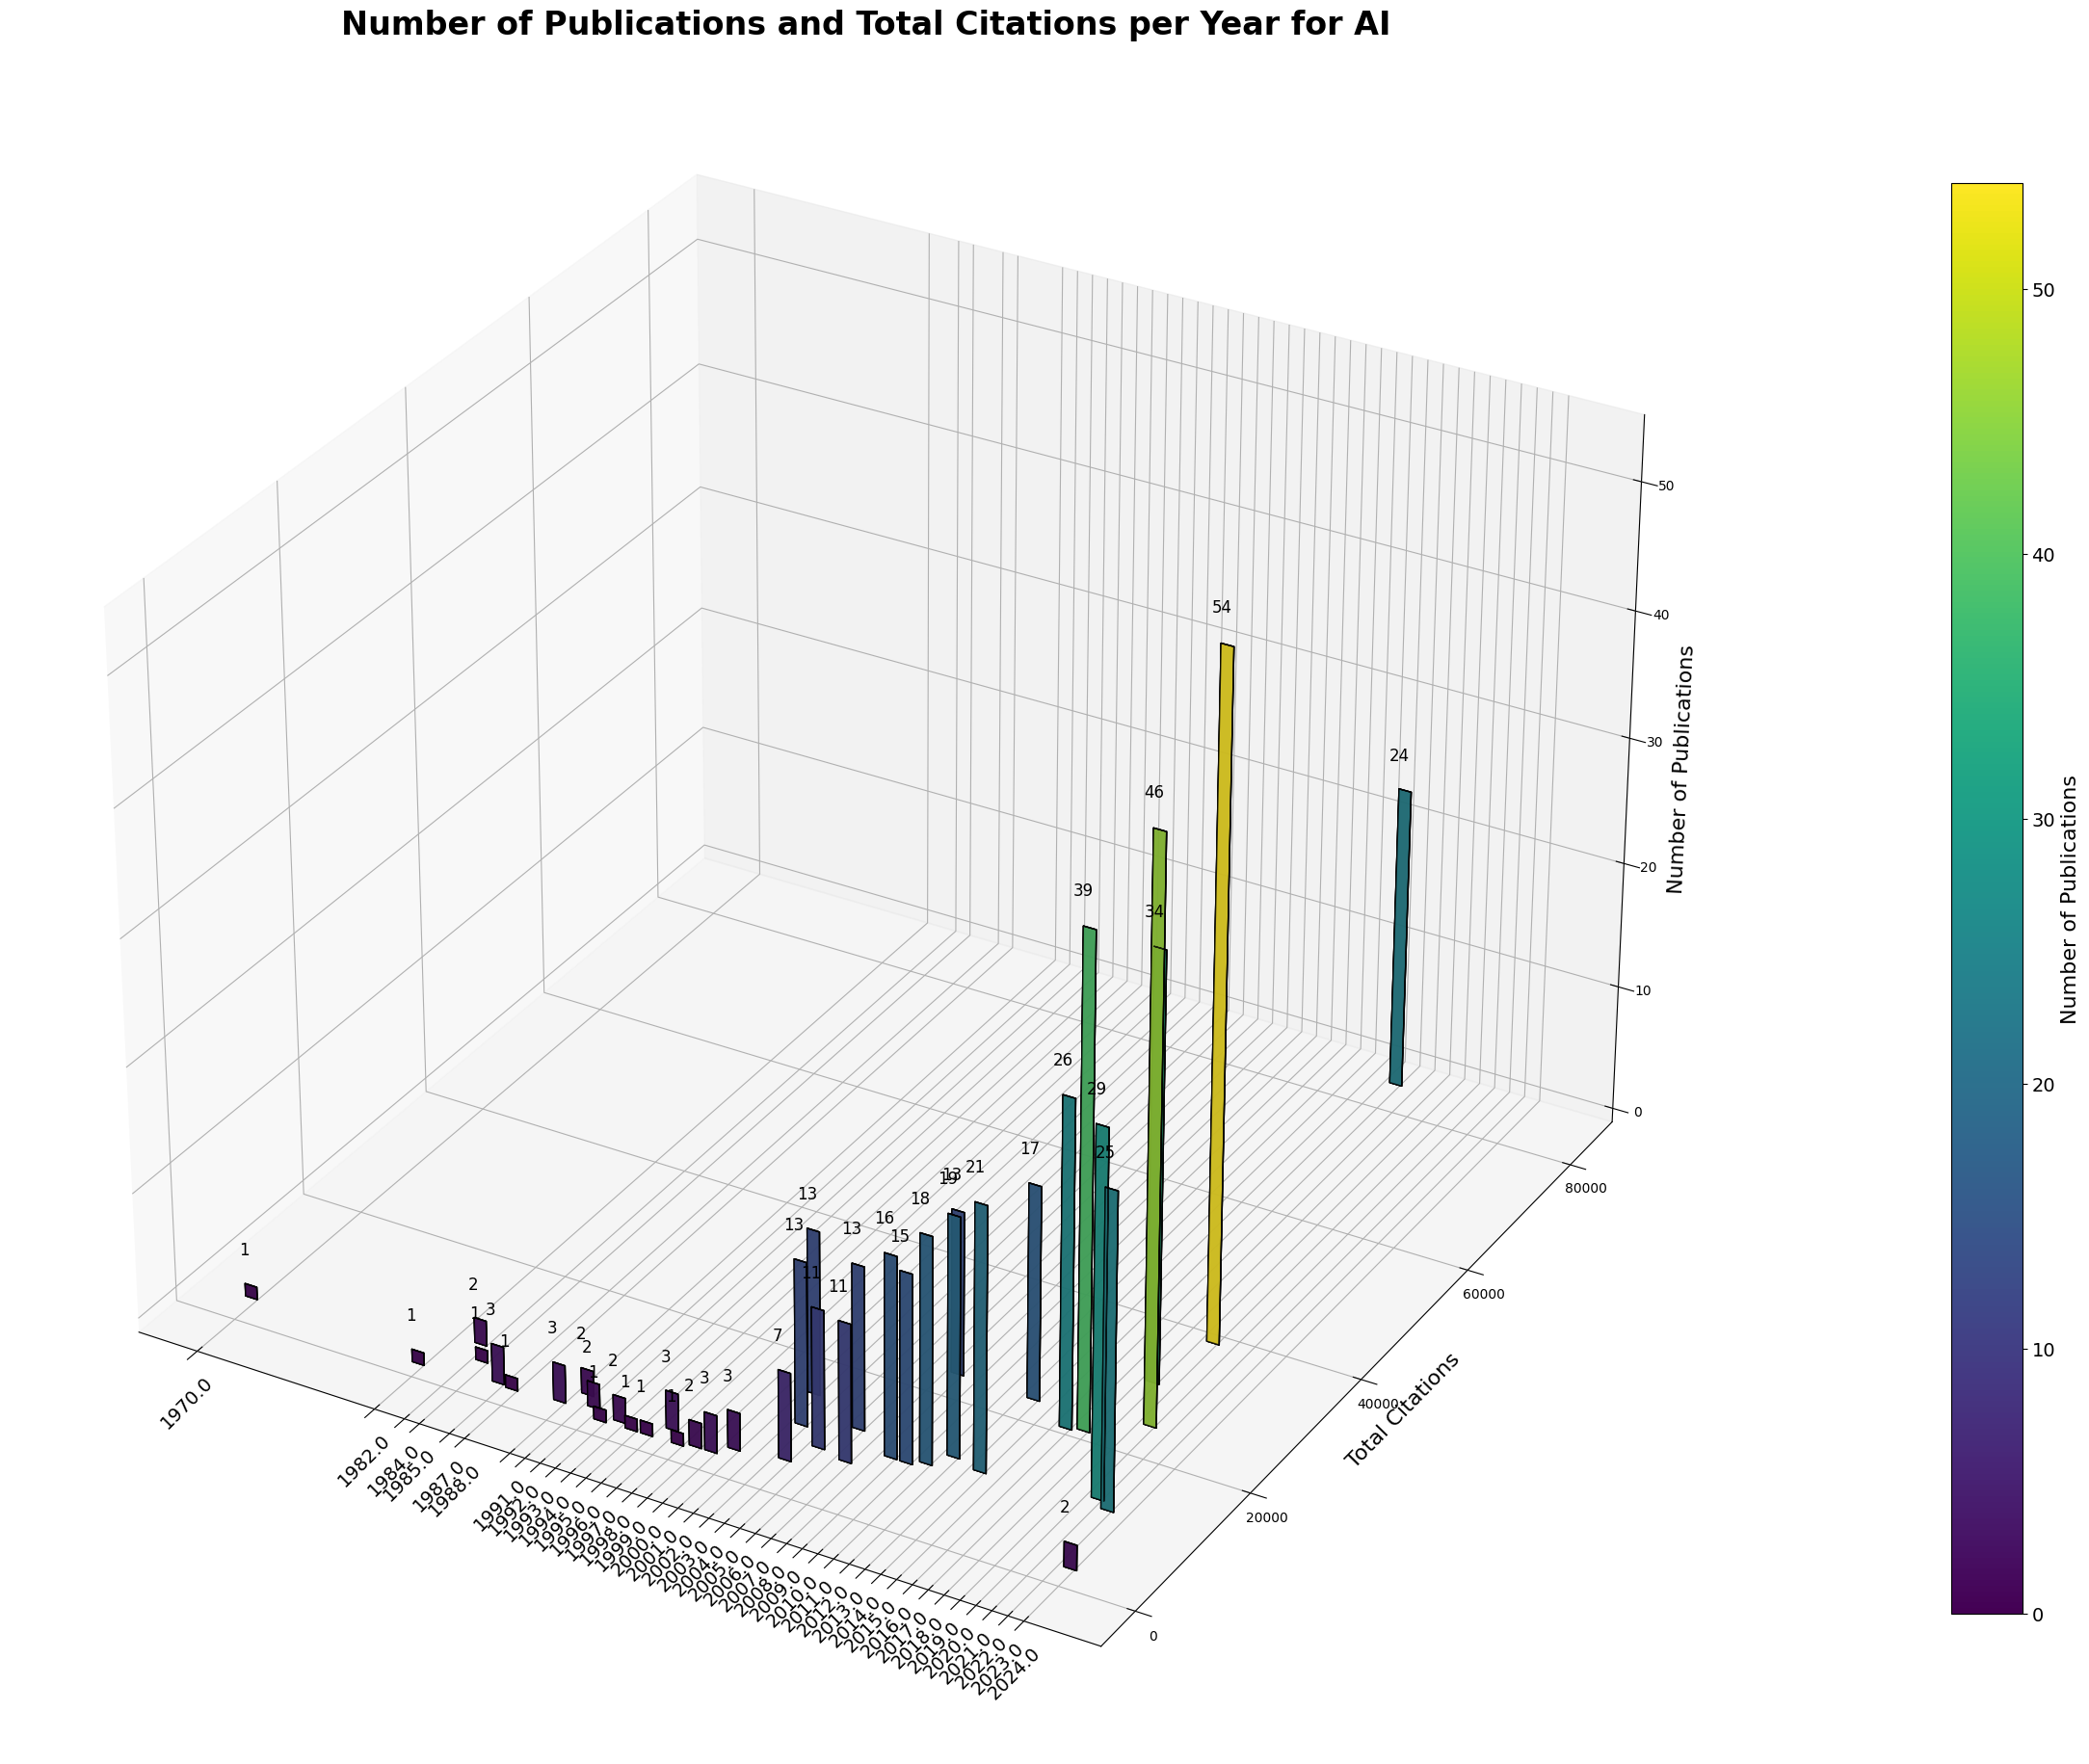

3D chart saved as 3d_publication_and_citation_trend_AI.png with DPI 600.


In [7]:
# Calculate the number of publications per year
year_counts = df['Year'].value_counts().sort_index()

# Calculate total citations per year
citations_per_year = df.groupby('Year')['Citations'].sum().reindex(year_counts.index, fill_value=0)

# Create a 3D bar plot with larger figure size for better visibility
fig = plt.figure(figsize=(24, 30))
ax = fig.add_subplot(111, projection='3d')

# Define the positions of the bars on the x-axis
x_pos = year_counts.index
y_pos = citations_per_year.values  # Total citations for each year
z_pos = [0] * len(year_counts)  # Starting height of the bars

# Define the dimensions of the bars
dx = 0.8  # Width of the bars
dy = 10    # Depth of the bars
dz = year_counts.values  # Height of the bars (number of publications)

# Create 3D bars with colors based on height
colors = plt.cm.viridis(dz / max(dz))  # Using a colormap for better color representation
bars = ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors, alpha=0.8, edgecolor='k')  # Edge color for better visibility

# Customize the plot title and labels with larger fonts
ax.set_title('Number of Publications and Total Citations per Year for AI', fontsize=24, fontweight='bold')
ax.set_ylabel('Total Citations', fontsize=16)
ax.set_zlabel('Number of Publications', fontsize=16)

# Rotate the x-ticks for better visibility
ax.set_xticks(year_counts.index)
ax.set_xticklabels(year_counts.index, rotation=45, fontsize=14)

# Add data labels on top of the bars
for i in range(len(dz)):
    yval = dz[i]
    ax.text(x_pos[i], y_pos[i], yval + 2, int(yval), va='bottom', ha='center', fontsize=12, color='black')

# Add grid lines for better readability
ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

# Create a color bar with a specified shrink size
norm = plt.Normalize(0, max(dz))  # Normalize the data for the color map
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # Only needed for older versions of Matplotlib
cbar = plt.colorbar(sm, ax=ax, pad=0.1, shrink=0.5)  # Adjust shrink to change width
cbar.set_label('Number of Publications', fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Save the plot with 600 DPI resolution
output_file = "3d_publication_and_citation_trend_AI.png"
plt.savefig(output_file, dpi=600)

# Show the plot
plt.tight_layout()
plt.show()

print(f"3D chart saved as {output_file} with DPI 600.")


##AI Research Publications: Authors Analysis

<ipython-input-8-4cb87b45f3c5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=author_counts.index, y=author_counts.values, palette="viridis", alpha=0.9)


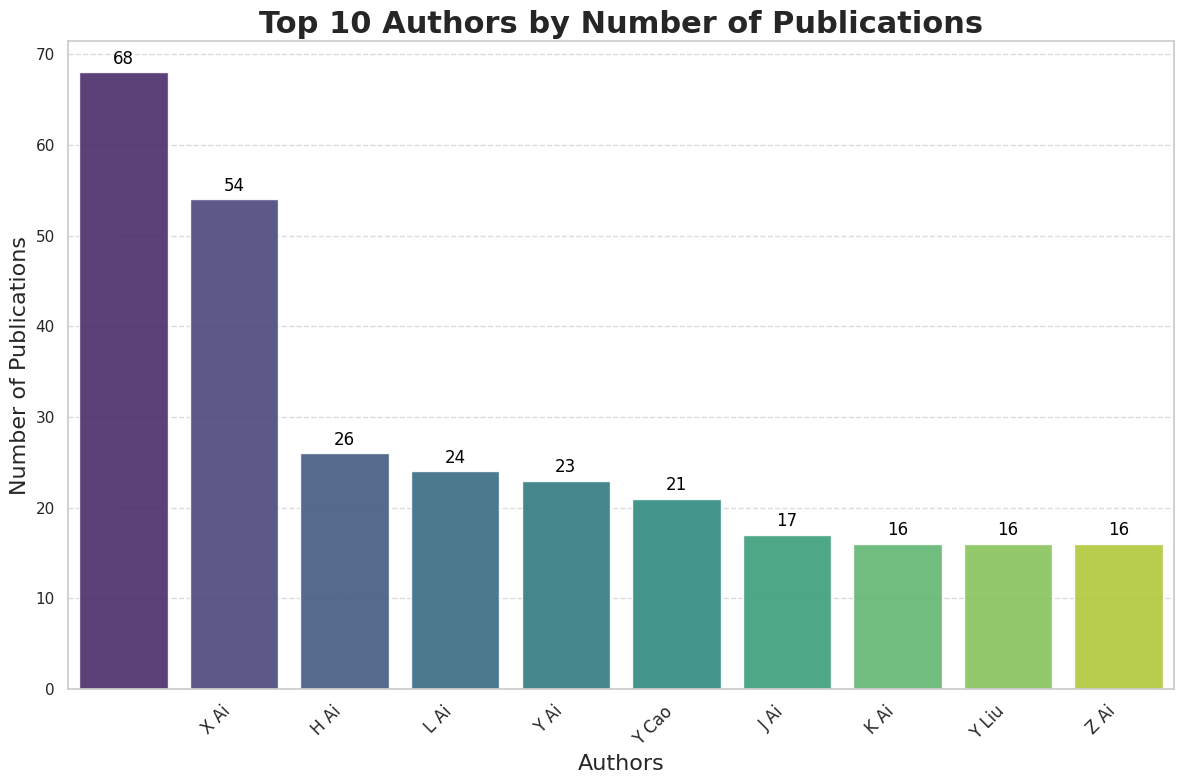

Top authors chart saved as top_authors_publication_trend.png with DPI 600.


In [8]:
# Split authors and count publications
all_authors = df['Authors'].dropna().apply(lambda x: eval(x))  # Convert string representation of list to actual list
all_authors = [author.strip() for sublist in all_authors for author in sublist]  # Flatten the list

# Count the number of publications for each author
author_counts = pd.Series(all_authors).value_counts().head(10)  # Taking top 10 authors for better visibility

# Create a bar plot with seaborn for better aesthetics
plt.figure(figsize=(12, 8))  # Set the figure size
sns.set_theme(style="whitegrid")  # Set the theme

# Create bars
bars = sns.barplot(x=author_counts.index, y=author_counts.values, palette="viridis", alpha=0.9)

# Customize the plot title and labels
plt.title('Top 10 Authors by Number of Publications', fontsize=22, fontweight='bold')
plt.xlabel('Authors', fontsize=16)
plt.ylabel('Number of Publications', fontsize=16)

# Rotate the x-ticks for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add data labels on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval),
             ha='center', va='bottom', fontsize=12, color='black')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot with 600 DPI resolution
output_file = "top_authors_publication_trend.png"
plt.savefig(output_file, dpi=600, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

print(f"Top authors chart saved as {output_file} with DPI 600.")


##Word Cloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


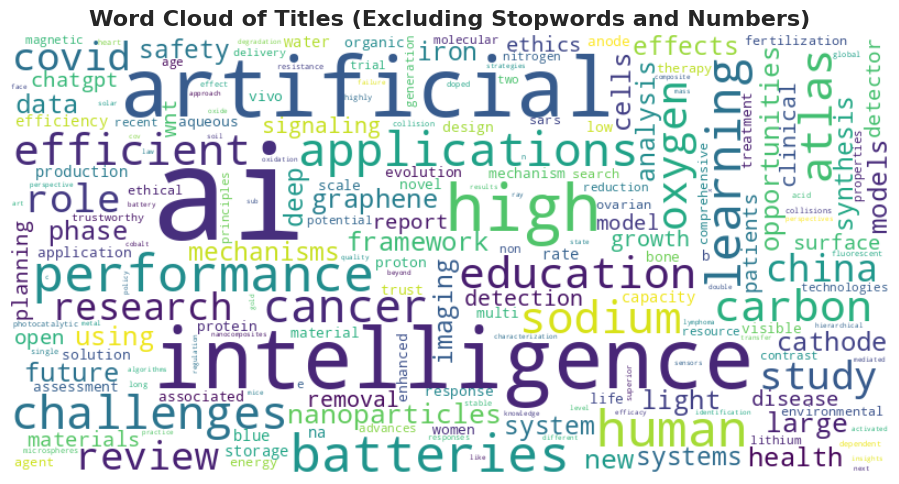

Word cloud saved as word_cloud_of_titles_without_stopwords.png with DPI 600.


In [9]:
# Download the stopwords from nltk (only run this once)
nltk.download('stopwords')

# Function to create a word cloud
def create_word_cloud(df, multi_word_phrases, additional_stopwords, output_file):
    # Load the stopwords
    stop_words = set(stopwords.words('english')).union(set(additional_stopwords))

    # Read data from the Excel file


    # Extract titles and concatenate into a single string
    all_titles = ' '.join(df['Title'].dropna().tolist())

    all_titles = all_titles.lower()

    # Create a regex pattern for single words and multi-word phrases, excluding numbers
    phrase_pattern = r'\b(?:' + '|'.join(map(re.escape, multi_word_phrases)) + r'|[A-Za-z]+)\b'
    words = re.findall(phrase_pattern, all_titles)

    # Filter out stopwords and empty strings
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Count occurrences of each word/phrase
    word_counts = Counter(filtered_words)

    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=200,
        colormap='viridis'  # Change color map for better aesthetics
    ).generate_from_frequencies(word_counts)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title('Word Cloud of Titles (Excluding Stopwords and Numbers)', fontsize=16, fontweight='bold')
    plt.tight_layout()

    # Save the word cloud as an image with 600 DPI resolution
    plt.savefig(output_file, dpi=600)
    plt.show()

# Define your parameters
multi_word_phrases = ["Artificial Intelligence", "Machine Learning", "Deep Learning", "Natural Language Processing"]
additional_stopwords = {"the", "and", "is", "to", "in", "for", "on", "of", "with", "as", "that", "by", "at", "from", "this","ion","based","cell"}

# Create the word cloud
output_file = "word_cloud_of_titles_without_stopwords.png"
create_word_cloud(df, multi_word_phrases, additional_stopwords, output_file)

print(f"Word cloud saved as {output_file} with DPI 600.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


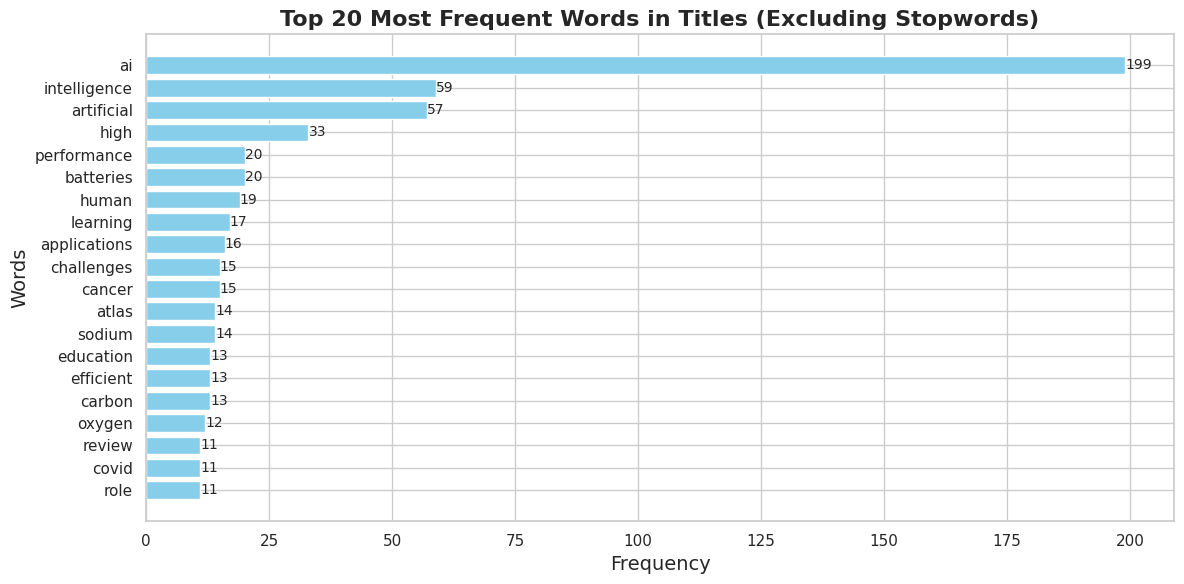

Bar chart saved as top_20_words_bar_chart.png with DPI 600.


In [10]:


# Download the stopwords from nltk (only run this once)
nltk.download('stopwords')

# Function to create a bar chart for the top 20 words
def create_bar_chart(df, multi_word_phrases, additional_stopwords, output_bar_chart_file):
    # Load the stopwords
    stop_words = set(stopwords.words('english')).union(set(additional_stopwords))

    # Extract titles and concatenate into a single string
    all_titles = ' '.join(df['Title'].dropna().tolist())

    all_titles = all_titles.lower()

    # Create a regex pattern for single words and multi-word phrases, excluding numbers
    phrase_pattern = r'\b(?:' + '|'.join(map(re.escape, multi_word_phrases)) + r'|[A-Za-z]+)\b'
    words = re.findall(phrase_pattern, all_titles)

    # Filter out stopwords and empty strings
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Count occurrences of each word/phrase
    word_counts = Counter(filtered_words)

    # Get the top 20 most common words
    common_words = word_counts.most_common(20)
    words, counts = zip(*common_words)  # Unzip into two lists

    # Create a bar plot for the top 20 words
    plt.figure(figsize=(12, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.title('Top 20 Most Frequent Words in Titles (Excluding Stopwords)', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.gca().set_facecolor('white')  # Set background color to white

    # Add count labels on each bar
    for i in range(len(counts)):
        plt.text(counts[i], i, f'{counts[i]}', va='center', ha='left', fontsize=10)

    plt.tight_layout()

    # Save the bar chart as an image with 600 DPI resolution
    plt.savefig(output_bar_chart_file, dpi=600, bbox_inches='tight')
    plt.show()

# Define your parameters
multi_word_phrases = ["Artificial Intelligence", "Machine Learning", "Deep Learning", "Natural Language Processing"]
additional_stopwords = {"the", "and", "is", "to", "in", "for", "on", "of", "with", "as", "that", "by", "at", "from", "this","ion","based","cell"}

# Create the bar chart
output_bar_chart_file = "top_20_words_bar_chart.png"
create_bar_chart(df, multi_word_phrases, additional_stopwords, output_bar_chart_file)

print(f"Bar chart saved as {output_bar_chart_file} with DPI 600.")
